## Introduction:

This notebook is devoted to the Ex. 2.3, related to data distribution and histogram plotting .. 


Downloading the following pmf.py notebook in mandate for this exercise .. 

http://greenteapress.com/thinkstats/Pmf.py


## Part-1: 

The mode of a distribution is the most frequent value (see https://en.wikipedia.org/wiki/Mode_(statistics)). Write a function called Mode that takes a Hist object and returns the most frequent value.

## Part-2:  

As a more challenging version, write a function called AllModes that takes a Hist object and returns a list of value-frequency pairs in descending order of frequency. Hint: the operator module provides a function called itemgetter which you can pass as a key to sorted.

In [2]:
import Pmf
import matplotlib.pyplot as plt
import operator
%matplotlib inline
import numpy as np

In [3]:
x = [3, 2, 2, 2, 1, 3, 5] ## these data already mentioned in this section in the textbook .. however, I repeated the values of 2 and 3  

In [4]:
hist = {} # create data_dict
for i in x:
    hist[i] = hist.get(i, 0) + 1 ## 1 increases the counter 

hist #data dict ==> number and its freq

{1: 1, 2: 3, 3: 2, 5: 1}

In [5]:
hist = Pmf.MakeHistFromList(x)
hist    ## hist object 

In [6]:
## to access the elements in the hist object .. 

hist.Freq(1)

1

We can iterate the hist to display all its item, freq pairs .. 

In [7]:
for val, freq in hist.Items():
    print val, freq

1 1
2 3
3 2
5 1


In [9]:
def Mode(hist): ## mode is the most frequent value
    
    lists = sorted(hist.Items())  ## returns ordered list (order by the items not their freq.)
    x_, y = zip(*lists)  ## zip: seperates items, freqs into two vectors .. i.e. x carries items and y carries freq.  

    max_value = max(y)  ## carries max freq 
    max_index = y.index(max_value) ## index of the max freq .. 

    return x_[max_index], x_, y  ## find item that has the max index 

In [11]:
mode_index, _, _ = Mode(hist) # 2 has the most freq. value that is repeated 3 times 
mode_index

2

### Justification:

We can easily assure that the above results are correct  by observing the items in x and their frequencies .. 

and we can also draw the above list and check that the 2nd index contains the highest repeatitive value .. 

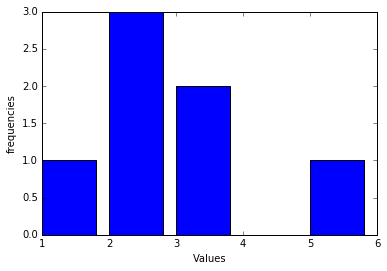

In [12]:
_, x_, y = Mode(hist)
plt.bar(x_, y)
plt.xlabel('Values')
plt.ylabel('frequencies')

### 3rd check: 

I calculated the mode() using excel built in function .. to make sure it is also 2 as well .. 

## Part-2:

allModes() .. 

In [14]:
def allModes(hist):
    sorted_x = sorted(hist.Items(), key=operator.itemgetter(1), reverse= True)
    
    return sorted_x

In [16]:
allModes(hist) ## returns the items and their freq. in descending order 

[(2, 3), (3, 2), (1, 1), (5, 1)]

### Justification:

the above function returns the items and their freq. in desending order .. with the help of the built in function sorted() .. 

the defualt order for this function is ascending .. this is why reverse is set to True .. 

itemgetter() fetches the item from its operand .. 

the value of 1 in itemgetter() represents fetching the freq. values and order them descending .. 
if value of 0 is set .. the items themselves will be ordered in desending order not their freq. 

As illustrated below .. 

Reference ==> https://docs.python.org/2/library/operator.html

In [17]:
def allModes(hist):
    sorted_x = sorted(hist.Items(), key=operator.itemgetter(0), reverse= True)
    
    return sorted_x

In [18]:
allModes(hist)

[(5, 1), (3, 2), (2, 3), (1, 1)]